Basically we are plotting the sales over time, by county, and by product type. The model that will work best for us should be Linear Regression since sales over time is a continuous value... for the most part. (We could use Logistic Regression if we treat each sales number for each month, for each county, and for each product type as individual points. This is a model I will try out as well, once I can get Linear Regression to work. I can try out other models too, but for now the hard part is formatting the data to be used in a ML model.) 

We want to use the data we have to predict future sales by date, county and product type, based on previous sales by date, county and product type. To do this we must convert all data into numeric values the computer can use to generate a ML model. 

We need to scale and encode the data to convert it to numbers. Once the data has been encoded, we can split our preprocessed data into feature and target arrays. This is the part I am having difficulty with. Please feel free to look at the code and offer solutions. I worked on this for several hours yesterday and an other seveal today. I feel at this point I need help from someone else. I plan to look at this again tomorrow and will try to ask for help on Monday office hour before class if I (we) cannot solve it by then. ~Ryan 5.14 at 4:40pm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#  Import and read the data
cannabis_df = pd.read_csv("cleanCountyProductTrendData.csv")
cannabis_df

,SalesMonthDate,Product Type,County,Market Share County,Sales
0,2016-10-01,Concentrate/Extract,Clackamas,15.14,947.20
1,2016-10-01,Concentrate/Extract,Clatsop,19.55,13057.00
2,2016-10-01,Concentrate/Extract,Deschutes,12.36,9763.45
3,2016-10-01,Concentrate/Extract,Hood River,21.23,23438.44
4,2016-10-01,Concentrate/Extract,Jackson,31.27,95346.45
...,...,...,...,...,...
9509,2022-04-01,Usable MJ,Umatilla,44.69,646336.81
9510,2022-04-01,Usable MJ,Wallowa,52.89,48779.53
9511,2022-04-01,Usable MJ,Wasco,48.13,178133.02
9512,2022-04-01,Usable MJ,Washington,47.34,4298767.33


In [3]:
# Rename colunm names with camel style and drop Market Share County
cannabis_df = cannabis_df.rename(columns={'Product Type': 'ProductType', 'Market Share County': 'MarketShareCounty'})
cannabis_df = cannabis_df.drop(columns={'MarketShareCounty'})
cannabis_df

,SalesMonthDate,ProductType,County,Sales
0,2016-10-01,Concentrate/Extract,Clackamas,947.20
1,2016-10-01,Concentrate/Extract,Clatsop,13057.00
2,2016-10-01,Concentrate/Extract,Deschutes,9763.45
3,2016-10-01,Concentrate/Extract,Hood River,23438.44
4,2016-10-01,Concentrate/Extract,Jackson,95346.45
...,...,...,...,...
9509,2022-04-01,Usable MJ,Umatilla,646336.81
9510,2022-04-01,Usable MJ,Wallowa,48779.53
9511,2022-04-01,Usable MJ,Wasco,178133.02
9512,2022-04-01,Usable MJ,Washington,4298767.33


In [4]:
# Look at dtypes to prep for encoding later
cannabis_df.dtypes

SalesMonthDate     object
ProductType        object
County             object
Sales             float64
dtype: object

In [5]:
# Determine the number of unique values in each column.
cannabis_df.nunique()

SalesMonthDate      67
ProductType          7
County              31
Sales             9495
dtype: int64

In [6]:
# Look at Product Types 
product_types = cannabis_df.groupby(["ProductType"]).count()["Sales"]
product_types

ProductType
Concentrate/Extract                              1859
Edible/Tincture                                  1859
Industrial Hemp                                   231
Industrial Hemp Commodity/Product                1462
Inhalable Product with Non-Cannabis Additives     389
Other                                            1851
Usable MJ                                        1863
Name: Sales, dtype: int64

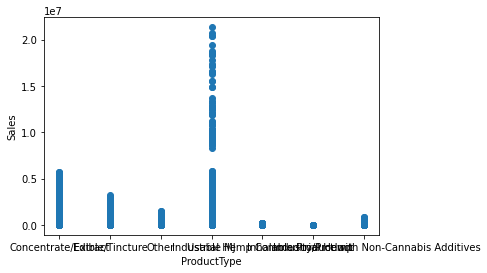

In [7]:
# Scatter plot ProductType vs Sales
plt.scatter(cannabis_df.ProductType, cannabis_df.Sales)
plt.xlabel('ProductType')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Bar plot ProductType vs Sales
# the scatter plot really was just a bar graph, so...
# needs better labels and formatting, descending order
plt.bar(cannabis_df.ProductType, cannabis_df.Sales)
plt.xlabel('ProductType')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Scatter plot County vs Sales
plt.scatter(cannabis_df.County, cannabis_df.Sales)
plt.xlabel('County')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Bar plot County vs Sales
# needs better formatting, descending order
plt.bar(cannabis_df.County, cannabis_df.Sales)
plt.xlabel('County')
plt.ylabel('Sales')
plt.show()

In [8]:
# Generate our categorical variable lists
cannabis_cat = cannabis_df.dtypes[cannabis_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
cannabis_df[cannabis_cat].nunique()

SalesMonthDate    67
ProductType        7
County            31
dtype: int64

In [9]:
# Encode Column Names to Numbers for ML
le = LabelEncoder()
cannabis_df2 = cannabis_df.copy()
cannabis_df2['County'] = le.fit_transform(cannabis_df2['County'])
cannabis_df2['ProductType'] = le.fit_transform(cannabis_df2['ProductType'])
cannabis_df2['SalesMonthDate'] = le.fit_transform(cannabis_df2['SalesMonthDate'])
cannabis_df2.dtypes

SalesMonthDate      int32
ProductType         int32
County              int32
Sales             float64
dtype: object

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cannabis_df2[cannabis_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cannabis_cat)
encode_df.head()

,SalesMonthDate_0,SalesMonthDate_1,SalesMonthDate_2,SalesMonthDate_3,SalesMonthDate_4,SalesMonthDate_5,SalesMonthDate_6,SalesMonthDate_7,SalesMonthDate_8,SalesMonthDate_9,...,County_21,County_22,County_23,County_24,County_25,County_26,County_27,County_28,County_29,County_30
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Set X values to include all relevant data except Sales. The Features.
X = cannabis_df2.copy()
X = X.drop("Sales", axis=1)
X

,SalesMonthDate,ProductType,County
0,0,0,2
1,0,0,3
2,0,0,7
3,0,0,11
4,0,0,12
...,...,...,...
9509,66,6,25
9510,66,6,27
9511,66,6,28
9512,66,6,29


In [12]:
# Set y equal to Sales. The Target. 
y = cannabis_df2["Sales"].values
y[:10]

array([   947.2 ,  13057.  ,   9763.45,  23438.44,  95346.45,  13703.61,
         4466.93,  64188.72, 327793.35,    414.65])

In [13]:
# Set up X and y train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Creating the decision tree classifier instance.
model = LinearRegression()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
#display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Ignore the cells below here. They are previous attempts at working code that I don't want to delete just yet. 

In [ ]:
# Split our preprocessed data into our features and target arrays
X = cannabis_df.drop(columns=["Sales"], axis=1).values 
y = cannabis_df.Sales.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)

In [ ]:
# I thought this step was necessary to convert SalesMonthDate to a number.
# I saw Brian's code to clean up the data and it looked like he did this already,
# but as you can see above it is still listed as an object. 

# Convert DateTime from object to datetime64
#cannabis_df['SalesMonthDate'] = pd.to_datetime(cannabis_df["SalesMonthDate"])
##cannabis_df.dtypes

In [ ]:
# Scale the Data
data_scaler = StandardScaler()
cannabis_data_scaled = data_scaler.fit_transform(cannabis_df2)
#cannabis_data_fit
cannabis_data_scaled[:5]